In [1]:
"""
        SETUP ENVIRONMENT

Choose a game:
- "Cart" # ok for 100 epoch
- "Car" # not good choice
- "Pendulum" # not good choice
- "Lake" # demand more then 1500 epoch
- "Maze" # 100 epoch is OK
- "Toy" # 100 epoch
"""
GAME_NAME = "Toy"
"""
            INITIALIZING AGENTS and ENVIRONMENT
"""
"""-------------------------------------------------------------------"""
from enviroment import *
env, obs_dim, action_dim = game_setup(GAME_NAME )

In [2]:
"""
                 SETUP AGENT and TRAINING
"""
"""REINFORCE"""
BETA_REIN_FULL = 0.1 #Betas are scalar by which we multiply bias terms in NN at initialization. They are used to control Chaos order.
BETA_REIN_RESNET = BETA_REIN_FULL
LEARNING_RATE_REIN = 0.0001
HORIZON_REIN = 4
HIDDEN_DIM_REIN = 32
"""MATRYOSHKA"""
BETA_MTR_FULL = 0.1
LEARNING_RATE_MTR = 0.0001
HORIZON_MTR= 4
HIDDEN_DIM_MTR = 32
TAU = 1
"""ResNet"""
BETA_MTR_RESNET = BETA_MTR_FULL
HIDDEN_DIM_RESNET = 16
LEARNING_RATE_RESNET = LEARNING_RATE_MTR * 10
"""Training"""
NUM_EPOCHES = 500
N_EPISODES = 10 # number of episodes per epoch. Used for both: Reinforce and Matryoshka
"""
                    INITIALIZING AGENTS
"""
"""-------------------------------------------------------------------"""
from NeuralNet import ReinforceAgent, MTRAgent
from MtrNet import ReinforceMtrNetAgent, MtrNetAgent
import torch
device = 'cuda' if torch.cuda.device_count() > 0 else 'cpu'
print(device)
#Reinforce Full Connected
agent1 = ReinforceAgent(obs_dim,action_dim, hidden_dim=HIDDEN_DIM_REIN,horizon= HORIZON_REIN, learning_rate= LEARNING_RATE_REIN, game_name=GAME_NAME, beta = BETA_MTR_FULL)
agent1.policy.ntk_init(beta=agent1.beta)
#Reinforce MTRNet (Custom ResNet)
agent2 = ReinforceMtrNetAgent(obs_dim,action_dim, hidden_dim=HIDDEN_DIM_RESNET,horizon= HORIZON_REIN, learning_rate= LEARNING_RATE_RESNET , game_name= GAME_NAME, tau=TAU, beta=BETA_REIN_RESNET)
agent2.policy.ntk_init(beta=agent2.beta)
#MTR extra-dimension
agent3 = MTRAgent(obs_dim, action_dim, hidden_dim= HIDDEN_DIM_MTR , horizon= HORIZON_MTR, learning_rate= LEARNING_RATE_MTR, game_name= GAME_NAME, tau=TAU, beta=BETA_MTR_FULL)
agent3.policy.ntk_init(beta=agent3.beta)
#MTR with MTRNet
agent4 = MtrNetAgent(obs_dim,action_dim, hidden_dim=HIDDEN_DIM_RESNET,horizon= HORIZON_MTR, learning_rate= LEARNING_RATE_RESNET , game_name= GAME_NAME, tau=TAU, beta=BETA_MTR_RESNET)
agent4.policy.ntk_init(beta=agent4.beta)

cuda


beta full = 0.1    beta resnet = 0.1
Epoch 1
Reward: 0.8495185980241431  and  -2.5762163546892034


C:\Users\koq1231\PycharmProjects\RL\NeuralNet.py:147: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:248.)
  states_tensor = torch.FloatTensor(states)


Epoch 21
Reward: 1.43179335031008  and  2.372215537637061
Epoch 41
Reward: 2.045926032811537  and  0.13478878473989353
Epoch 61
Reward: 3.9505848318276926  and  -0.7003474498658605
Epoch 81
Reward: 0.7934713129031186  and  2.7418623929603556
Epoch 101
Reward: 3.847324791895411  and  3.3370167160399133
Epoch 121
Reward: 4.244104106563853  and  4.955235009349776
Epoch 141
Reward: 2.9856767598148717  and  4.596793170404281


KeyboardInterrupt: 

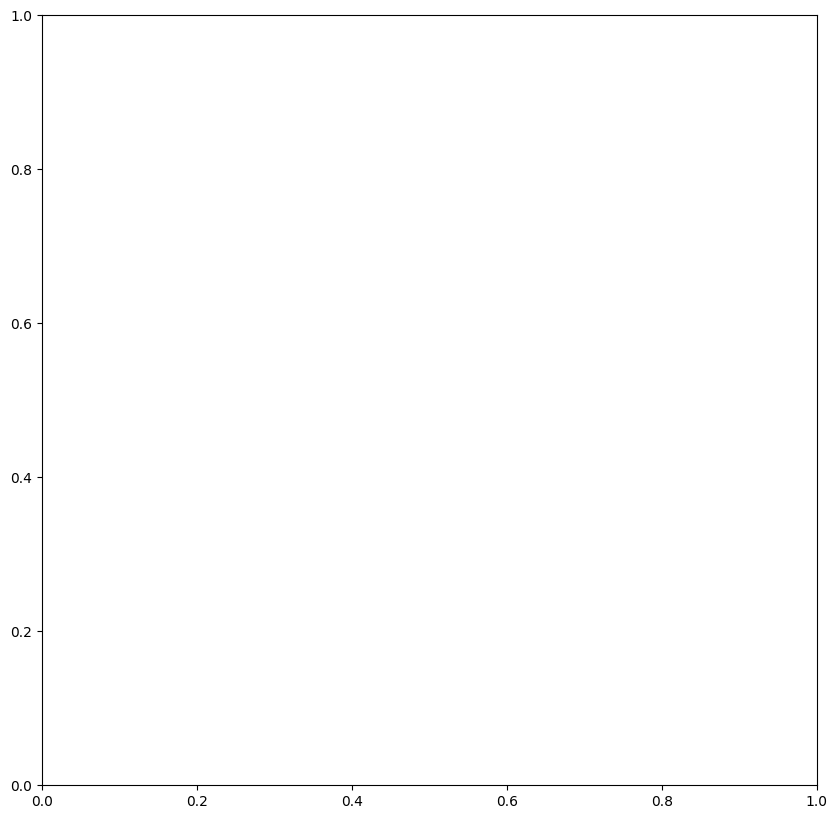

In [3]:
"""
        TRAINING (REINFORCE)
        Remark: we are training two reinforce agents
"""
"""-------------------------------------------------------------------"""
from utils import run_episodes
env_reset(env)
# list to store loss/rewards
loss_list_1 = []
loss_list_2 = []
# Train for a number of epochs
print(f"beta full = {agent1.beta}    beta resnet = {agent2.beta}")
for epoch in range(NUM_EPOCHES ):
    # Collect episodes
    episodes_1 = run_episodes(agent1, env, n_episodes=N_EPISODES)
    episodes_2 = run_episodes(agent2, env, n_episodes=N_EPISODES)
    # Update the policy based on the episodes
    loss_list_1.append( agent1.train( episodes_1, clip_grad= False) )
    loss_list_2.append(agent2.train(episodes_2, clip_grad= False) )
    if epoch%20 == 0:
        print(f"Epoch {epoch + 1}")
        print(f'Reward: {loss_list_1[-1]}  and  {loss_list_2[-1]}')
    env_reset(env)
close_env(env)

In [13]:
"""
    Matryoshka Training
"""
"""-------------------------------------------------------------------"""
import matplotlib.pyplot as plt
from utils import run_episodes_mtr
env_reset(env)
loss_list_3 = []
loss_list_4 = []
print(f"beta full = {agent3.beta}    beta resnet = {agent4.beta}")
for epoch in range(NUM_EPOCHES ):
    episodes_3 = run_episodes_mtr(agent3, env, n_episodes=N_EPISODES)
    episodes_4 = run_episodes(agent4, env, n_episodes=N_EPISODES)
    loss_list_3.append(agent3.train(episodes_3, clip_grad= False))
    loss_list_4.append(agent4.train(episodes_4, clip_grad= False))
    if epoch%20 == 0:
        print(f"Epoch {epoch + 1}")
        print(f'Reward: {loss_list_3[-1]}  and  {loss_list_4[-1]}')
    env_reset(env)
close_env(env)

beta full = 0.1    beta resnet = 0.1
Epoch 1
Reward: -0.37926212671090814  and  -0.035056556216431514
Epoch 21
Reward: 0.5665416750526356  and  0.3262350365412928
Epoch 41
Reward: -1.2255217669805718  and  2.143730452911798
Epoch 61
Reward: 0.2111065575543032  and  2.804473318843829
Epoch 81
Reward: -0.5226903165484712  and  0.10275295340420691
Epoch 101
Reward: 3.0002119646482033  and  2.6256380945574516
Epoch 121
Reward: 2.5416239812635273  and  3.4442527889928103
Epoch 141
Reward: 3.054718074031381  and  1.4219478172727245
Epoch 161
Reward: 3.8398455917877357  and  0.6094917272901762
Epoch 181
Reward: 3.263478702331736  and  3.730543336987374
Epoch 201
Reward: 3.5525485521284645  and  2.734787362259357
Epoch 221
Reward: 2.534310926923455  and  3.323529301635419
Epoch 241
Reward: 4.529577234901188  and  3.8708038935356903
Epoch 261
Reward: 2.700632227875137  and  5.637540436552745
Epoch 281
Reward: 2.863052053331065  and  5.6375404365527455
Epoch 301
Reward: 2.9783599254857815  and  

In [14]:
"""
    Matryoshka "ORIGINAL" Training
"""
HIDDEN_DIM_ORIGINAL = 16
HORIZON_ORIGINAL = 3
BETA_ORIGINAL = 0.1
TAU_ORIGINAL = 0.4
LEARNING_RATE_ORIGINAL = LEARNING_RATE_RESNET
"""-------------------------------------------------------------------"""
from original import OriginalMtrAgent
import matplotlib.pyplot as plt
# Set-up agent
agent5 = OriginalMtrAgent(obs_dim,action_dim, hidden_dim=HIDDEN_DIM_ORIGINAL,horizon= HORIZON_ORIGINAL, learning_rate= LEARNING_RATE_ORIGINAL , game_name= GAME_NAME, tau=TAU_ORIGINAL, beta=BETA_ORIGINAL)
agent5.policy.ntk_init(beta=agent5.beta)

env_reset(env)
loss_list_5 = []
print(f"beta = {agent5.beta}")
for epoch in range(NUM_EPOCHES ):
    episodes_5 = run_episodes(agent5, env, n_episodes=N_EPISODES)
    loss_list_5.append(agent5.train(episodes_5, clip_grad= False))
    if epoch%20 == 0:
        print(f"Epoch {epoch+1}")
        print(f'Reward: {loss_list_5[-1]}')
    env_reset(env)
close_env(env)

beta = 0.1
Epoch 1
Reward: -3.0045009478557647
Epoch 21
Reward: 2.9161169496849584
Epoch 41
Reward: 4.027180796567691
Epoch 61
Reward: 4.027180796567693
Epoch 81
Reward: 4.094575885156618
Epoch 101
Reward: 4.043955293989493
Epoch 121
Reward: 4.128273429451082
Epoch 141
Reward: 4.111350382578419
Epoch 161
Reward: 3.8695218212981706
Epoch 181
Reward: 4.094575885156619
Epoch 201
Reward: 4.077652838283955
Epoch 221
Reward: 4.043955293989492
Epoch 241
Reward: 4.161970973745545
Epoch 261
Reward: 4.195668518040008
Epoch 281
Reward: 4.010257749695029
Epoch 301
Reward: 4.077652838283955
Epoch 321
Reward: 4.077652838283955
Epoch 341
Reward: 3.9596371585279018
Epoch 361
Reward: 4.263063606628936
Epoch 381
Reward: 4.161970973745545
Epoch 401
Reward: 4.128273429451082
Epoch 421
Reward: 4.195668518040008
Epoch 441
Reward: 4.010257749695029
Epoch 461
Reward: 4.195668518040009
Epoch 481
Reward: 4.161970973745545


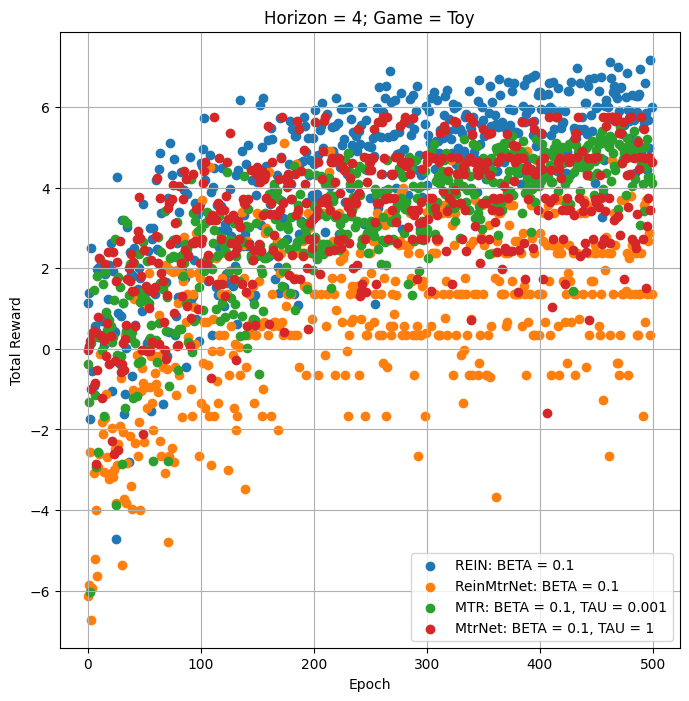

In [19]:
"""
        COMPARE REINFORCE VS MTR
        Remark: Run if you have trained both: Reinforce and Matryoshka.
"""
"""-------------------------------------------------------------------"""
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(1,1,1)
ax1.scatter(range(len(loss_list_1)),loss_list_1, label=f"{agent1.name}: BETA = {agent1.beta}")
ax1.scatter(range(len(loss_list_2)),loss_list_2, label=f"{agent2.name}: BETA = {agent2.beta}")
ax1.scatter(range(len(loss_list_3)),loss_list_3, label=f"{agent3.name}: BETA = {agent3.beta}, TAU = {agent3.tau}")
ax1.scatter(range(len(loss_list_4)),loss_list_4, label=f"{agent4.name}: BETA = {agent4.beta}, TAU = {agent4.tau}")
ax1.set_title(f"Horizon = {HORIZON_MTR}; Game = {GAME_NAME}")
ax1.set_ylabel("Total Reward")
ax1.set_xlabel("Epoch")
ax1.grid()
ax1.legend()
plt.savefig(f'images/{GAME_NAME}_3.jpg', format='jpeg')
plt.show()

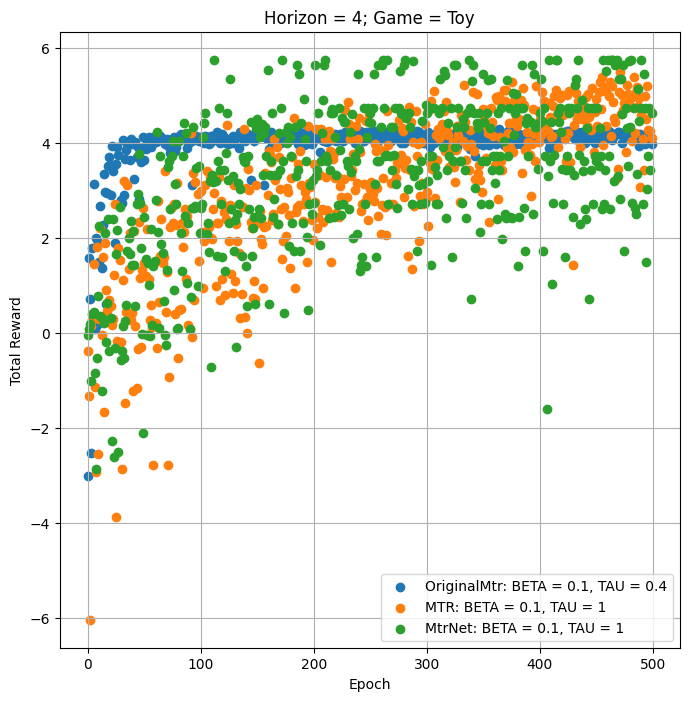

In [15]:
"""
        COMPARE ORIGINAL VS MTRNet VS MTR extra-dim.
        Remark: Run if you have trained both: Original and Matryoshka.
"""
"""-------------------------------------------------------------------"""
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(1,1,1)
ax1.scatter(range(len(loss_list_5)),loss_list_5, label=f"{agent5.name}: BETA = {agent5.beta}, TAU = {agent5.tau}")
ax1.scatter(range(len(loss_list_3)),loss_list_3, label=f"{agent3.name}: BETA = {agent3.beta}, TAU = {agent3.tau}")
ax1.scatter(range(len(loss_list_4)),loss_list_4, label=f"{agent4.name}: BETA = {agent4.beta}, TAU = {agent4.tau}")
ax1.set_title(f"Horizon = {HORIZON_MTR}; Game = {GAME_NAME}")
ax1.set_ylabel("Total Reward")
ax1.set_xlabel("Epoch")
ax1.grid()
ax1.legend()
plt.savefig(f'images/{GAME_NAME}_4.jpg', format='jpeg')
plt.show()

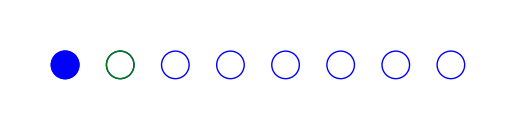

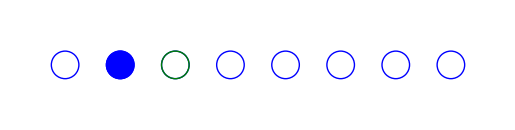

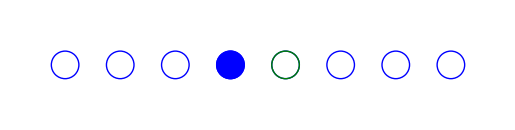

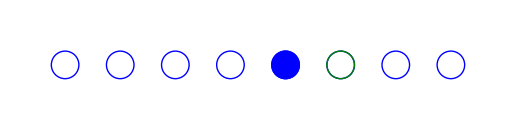

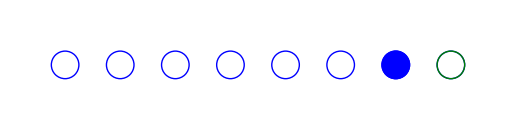

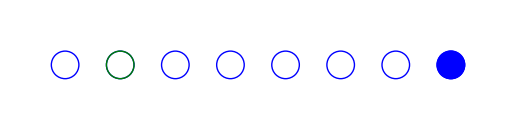

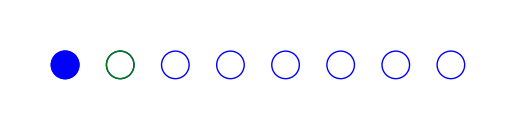

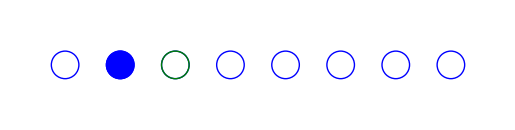

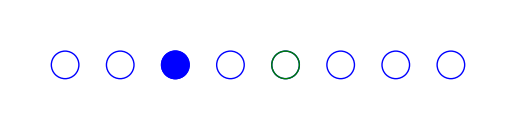

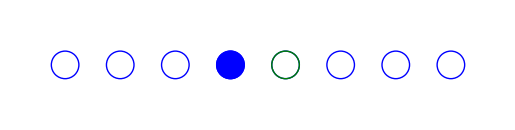

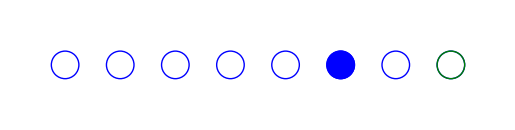

In [16]:
"""
        TEST AGENT REINFORCE
"""
NUMBER_OF_EPISODES = 1
"""-------------------------------------------------------------------"""
from enviroment import render
render(agent1,env, NUMBER_OF_EPISODES)
render(agent2,env, NUMBER_OF_EPISODES)

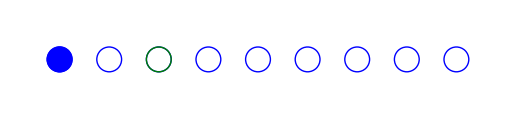

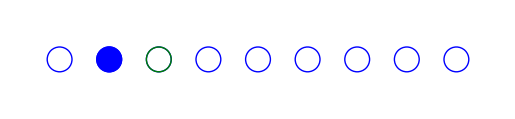

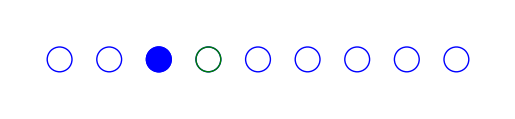

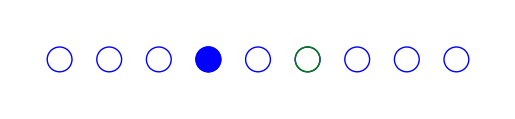

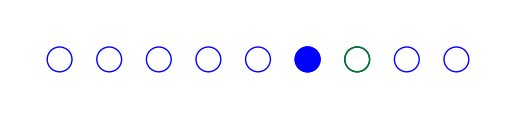

In [18]:
"""
        TEST AGENT MATRYOSHKA
"""
NUMBER_OF_EPISODES = 1
"""-------------------------------------------------------------------"""
from enviroment import render
render(agent3,env,NUMBER_OF_EPISODES)
render(agent4,env,NUMBER_OF_EPISODES)

In [16]:
"""
        TEST AGENT MATRYOSHKA ORIGINAL
"""
NUMBER_OF_EPISODES = 1
"""-------------------------------------------------------------------"""
from enviroment import render
render(agent5,env,NUMBER_OF_EPISODES)